# Project: What promotes higher rates of family female workers?

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

In this project, we are going to _analyse the impact of several indicators on the number of family female workers_. The data is extracted from [GapMinder](https://www.gapminder.org/data/).

The purpose of this analysis is to understand:
- What are the factors that give a stronger chance to a country to count more family female workers? 
- How did the female/male family workers ratio evolve over time in developed and emerging countries?

In this perspective, we will analyse _economy, education, equality and society_ indicators to estimate their effect on the rate of female family workers. We are going to select 10 countries around the world to frame this analysis.

####  Scope

> The 10 countries we will keep in the dataset for this analysis are:
1. Sweden
2. Germany
3. Belgium
4. Italy
5. Senegal
6. India
7. USA
8. Brasil
9. Syria
10. Australia

#### Questions

In this analysis, we will attempt to answer the following detailed questions:

1. How are the list of 10 countries ranked based on # of female workers ?
2. Which indicator has a highest average correlation with # of female workers ? 
3. What is the male/female ratio of family workers ?
4. What level of income/Aid for most equal ratio of male/female family workers ?
5. How did male/female ratio of family workers evolved in Belgium and Italy in the past vs. today ?

#### Data collection

> **Datasets**: we have downloaded 5 datasets from GapMinder in order to perform this analysis:
>
> - Female Family workers
> - Male Family workers
> - Income
> - Gender ratio of mean years at school (25 - 34 years)
> - Human development Index

In [1]:
# import packages
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import functools 
%matplotlib inline

# import datasets
df_female = pd.read_csv('female_family_workers_percent_of_female_employment.csv')
df_male = pd.read_csv('male_family_workers_percent_of_male_employment.csv')
df_income = pd.read_csv('income_per_person_gdppercapita_ppp_inflation_adjusted.csv')
df_school = pd.read_csv('mean_years_in_school_women_percent_men_25_to_34_years.csv')
df_hdi = pd.read_csv('hdi_human_development_index.csv')

<a id='wrangling'></a>
## Data Wrangling

#### Assessment
> Let's check each of these dataframes info, we noticed:
> - All these datasets look like they have the same structure: countries in rows and years in columns
> - Indicator data is in a float type, so no need to reformat them
> - Data is more complete only recently 
> - Some countries may be missing
> - School years and HDI only have collected data until 2015

In [2]:
# Female family workers
df_female.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 171 entries, 0 to 170
Data columns (total 49 columns):
country    171 non-null object
1970       1 non-null float64
1971       1 non-null float64
1972       1 non-null float64
1973       1 non-null float64
1974       1 non-null float64
1975       1 non-null float64
1976       4 non-null float64
1977       3 non-null float64
1978       3 non-null float64
1979       3 non-null float64
1980       4 non-null float64
1981       3 non-null float64
1982       4 non-null float64
1983       14 non-null float64
1984       13 non-null float64
1985       13 non-null float64
1986       16 non-null float64
1987       22 non-null float64
1988       22 non-null float64
1989       26 non-null float64
1990       37 non-null float64
1991       49 non-null float64
1992       47 non-null float64
1993       55 non-null float64
1994       59 non-null float64
1995       64 non-null float64
1996       76 non-null float64
1997       71 non-null float64
1998     

In [3]:
# Male family workers
df_male.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 170 entries, 0 to 169
Data columns (total 49 columns):
country    170 non-null object
1970       1 non-null float64
1971       1 non-null float64
1972       1 non-null float64
1973       1 non-null float64
1974       1 non-null float64
1975       1 non-null float64
1976       4 non-null float64
1977       3 non-null float64
1978       3 non-null float64
1979       3 non-null float64
1980       4 non-null float64
1981       3 non-null float64
1982       4 non-null float64
1983       14 non-null float64
1984       13 non-null float64
1985       13 non-null float64
1986       16 non-null float64
1987       22 non-null float64
1988       22 non-null float64
1989       26 non-null float64
1990       37 non-null float64
1991       49 non-null float64
1992       47 non-null float64
1993       55 non-null float64
1994       58 non-null float64
1995       64 non-null float64
1996       75 non-null float64
1997       72 non-null float64
1998     

In [4]:
# Income
df_income.head()

,country,1800,1801,1802,1803,1804,1805,1806,1807,1808,...,2031,2032,2033,2034,2035,2036,2037,2038,2039,2040
0,Afghanistan,603,603,603,603,603,603,603,603,603,...,2420,2470,2520,2580,2640,2700,2760,2820,2880,2940
1,Albania,667,667,667,667,667,668,668,668,668,...,18500,18900,19300,19700,20200,20600,21100,21500,22000,22500
2,Algeria,715,716,717,718,719,720,721,722,723,...,15600,15900,16300,16700,17000,17400,17800,18200,18600,19000
3,Andorra,1200,1200,1200,1200,1210,1210,1210,1210,1220,...,73200,74800,76400,78100,79900,81600,83400,85300,87200,89100
4,Angola,618,620,623,626,628,631,634,637,640,...,6270,6410,6550,6700,6850,7000,7150,7310,7470,7640


In [5]:
# School years
df_school.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 47 columns):
country    187 non-null object
1970       187 non-null float64
1971       187 non-null float64
1972       187 non-null float64
1973       187 non-null float64
1974       187 non-null float64
1975       187 non-null float64
1976       187 non-null float64
1977       187 non-null float64
1978       187 non-null float64
1979       187 non-null float64
1980       187 non-null float64
1981       187 non-null float64
1982       187 non-null float64
1983       187 non-null float64
1984       187 non-null float64
1985       187 non-null float64
1986       187 non-null float64
1987       187 non-null float64
1988       187 non-null float64
1989       187 non-null float64
1990       187 non-null float64
1991       187 non-null float64
1992       187 non-null float64
1993       187 non-null float64
1994       187 non-null float64
1995       187 non-null float64
1996       187 non-null float64


In [6]:
# HDI
df_hdi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 187 entries, 0 to 186
Data columns (total 27 columns):
country    187 non-null object
1990       143 non-null float64
1991       143 non-null float64
1992       143 non-null float64
1993       143 non-null float64
1994       143 non-null float64
1995       147 non-null float64
1996       147 non-null float64
1997       147 non-null float64
1998       147 non-null float64
1999       150 non-null float64
2000       167 non-null float64
2001       167 non-null float64
2002       167 non-null float64
2003       169 non-null float64
2004       172 non-null float64
2005       181 non-null float64
2006       181 non-null float64
2007       181 non-null float64
2008       181 non-null float64
2009       181 non-null float64
2010       187 non-null float64
2011       187 non-null float64
2012       187 non-null float64
2013       187 non-null float64
2014       187 non-null float64
2015       187 non-null float64
dtypes: float64(26), object(1)
m

### Data cleaning and new unified datasets

#### Cleaning

>So in terms of data:
> - In order to have one column by indicator in our newly formed dataset, we will calculate the average of each indicator
> - For the first questions, we will calculate the value of indicators by average from 2010 until 2015 (recent overview)
> - For the last question, we will calculate the value of indicators by average from 1995 until 2000 (past overview)
> - We will then merge all the datasets based on the countries
> - We need to check if all countries we want are there
> - Filter out countries we do not analyse
> - Sanity check for duplicates in the final dataset

We will create a loop because each dataset needs to go through the same transformation as they have the same structure. Each dataframe at this step can be described as a matrix of the chosen indicators by country and by year. The final goal in this data wrangling step, as explained in the bullet points above, is to gather all the indicators in one dataset, keep the country dimension and calculate 2 averages over time for each indicators. Then bring all this into one last dataframe containing the 10 chosen countries for this analysis.

In [7]:
# Create a list of dataframes extracted from our csv files in order to wrangle these datasets in the next step
list_dataframes = [df_female, df_male, df_income, df_school, df_hdi]


# Create function to get the name of a dataframe
def get_df_name(df):
    name =[x for x in globals() if globals()[x] is df][0]
    return name

In [8]:
# create loop to get from new dataframes from each indicator

for i in list_dataframes:

    # Prepare naming   
    x = get_df_name(i).split("_",2)[1]
    # new columns  
    y = x + "_10_15"
    z = x + "_95_00"
    # new dataframe
    df_name = "df_"+ x +"_ind"
    print(df_name)
   
    # Calculate mean for i indicator from 2010 to 2015 period per country
    k = i.loc[:,'2010':'2015'].mean(axis=1).round(2)
    # Calculate mean for i indicator from 1995 to 2000 period per country 
    l = i.loc[:,'1995':'2000'].mean(axis=1).round(2)

    # Add means to dataframe
    i [y] = k
    i [z] = l


   # Build a dataframe with only necessary information for our analysis and this indicator 
    
   # Get positions of last columns   
    a = i.shape[1]-2
    b = i.shape[1]
    
    # Build our dataframe   
    df = i.iloc[:,np.r_[0:1,a:b]]
    exec('{} = df'.format(df_name)) #It has been necessary to apply this exec statement in the end of the loop to give the 5 expected dataframes in our output 

df_female_ind
df_male_ind
df_income_ind
df_school_ind
df_hdi_ind


In [9]:
# New dataframes to join in one dataframe for our analysis
list_new_dfs = [df_female_ind, df_male_ind, df_income_ind, df_school_ind, df_hdi_ind]

In [10]:
# Merge all the dataframes using reduce() in order to pass the merge function to all elements in the list
df_final = functools.reduce(lambda x, y: pd.merge(x, y, on = 'country', how = 'left'), list_new_dfs)
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 171 entries, 0 to 170
Data columns (total 11 columns):
country         171 non-null object
female_10_15    137 non-null float64
female_95_00    106 non-null float64
male_10_15      138 non-null float64
male_95_00      107 non-null float64
income_10_15    171 non-null float64
income_95_00    171 non-null float64
school_10_15    167 non-null float64
school_95_00    167 non-null float64
hdi_10_15       168 non-null float64
hdi_95_00       153 non-null float64
dtypes: float64(10), object(1)
memory usage: 16.0+ KB


In [11]:
# Have the column names in order to identify the spelling of each country
# If the datasets are neat, we expect it will be the same names in each dataset so that when we merge it on country,
# it will not cause any issue
df_female.country.unique()

array(['Afghanistan', 'Albania', 'Algeria', 'Angola',
       'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia',
       'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh',
       'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan',
       'Bolivia', 'Bosnia and Herzegovina', 'Botswana', 'Brazil',
       'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Cambodia',
       'Cameroon', 'Canada', 'Cape Verde', 'Chad', 'Chile', 'Colombia',
       'Comoros', 'Congo, Dem. Rep.', 'Congo, Rep.', 'Costa Rica',
       "Cote d'Ivoire", 'Croatia', 'Cuba', 'Cyprus', 'Czech Republic',
       'Denmark', 'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt',
       'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia',
       'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia',
       'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala',
       'Guinea', 'Haiti', 'Honduras', 'Hungary', 'Iceland', 'India',
       'Indonesia', 'Iran', 'Ireland', 'Israel', 'It

In [12]:
# List the countries to keep in analysis
countries = ['Sweden', 'Belgium','Italy', 'Germany', 'Brazil', 'Senegal', 'India','United States', 'Australia', 'Syria'  ]

In [13]:
# Clean the final dataframe in order to only keep the countries we selected for the analysis
df_countries = df_final[df_final['country'].isin(countries)].reset_index(drop = True)
df_countries

,country,female_10_15,female_95_00,male_10_15,male_95_00,income_10_15,income_95_00,school_10_15,school_95_00,hdi_10_15,hdi_95_00
0,Australia,0.28,1.24,0.20,0.63,42650.00,32733.33,102.50,100.33,0.93,0.89
1,Belgium,1.56,4.90,0.42,0.54,41200.00,34716.67,104.00,102.50,0.89,0.86
2,Brazil,4.35,9.90,1.71,4.50,15016.67,11200.00,112.67,108.50,0.74,0.67
3,Germany,0.75,1.85,0.29,0.36,42666.67,34933.33,101.50,98.42,0.92,0.85
4,India,31.65,33.60,10.60,12.40,5015.00,2271.67,66.57,57.53,0.60,0.48
5,Italy,2.05,6.66,1.06,2.83,35000.00,34566.67,103.67,101.00,0.88,0.81
6,Senegal,29.35,NaN,19.50,NaN,2205.00,1815.00,62.22,54.67,0.48,0.38
7,Sweden,0.23,0.55,0.23,0.48,43866.67,33466.67,104.00,102.33,0.91,0.87
8,Syria,9.68,NaN,2.58,NaN,5343.33,5271.67,83.32,72.67,0.60,0.58
9,United States,0.09,0.17,0.06,0.08,50883.33,42616.67,103.00,100.67,0.92,0.88


In [14]:
df_final = df_female_ind.merge(df_male_ind, how = 'left', on='country').merge(df_income_ind, how = 'left', on='country').merge(df_school_ind, how = 'left', on='country').merge(df_hdi_ind, how = 'left', on='country')

In [15]:
# Check for duplicates
df_countries[df_countries.duplicated()].count()

country         0
female_10_15    0
female_95_00    0
male_10_15      0
male_95_00      0
income_10_15    0
income_95_00    0
school_10_15    0
school_95_00    0
hdi_10_15       0
hdi_95_00       0
dtype: int64

In [16]:
df_final

,country,female_10_15,female_95_00,male_10_15,male_95_00,income_10_15,income_95_00,school_10_15,school_95_00,hdi_10_15,hdi_95_00
0,Afghanistan,38.60,NaN,7.90,NaN,1741.67,937.50,23.20,19.75,0.47,0.33
1,Albania,43.98,NaN,22.15,NaN,10455.00,4626.67,102.00,98.25,0.76,0.64
2,Algeria,3.81,NaN,2.26,NaN,13266.67,9706.67,89.90,85.62,0.74,0.62
3,Angola,24.54,NaN,16.66,NaN,6081.67,3345.00,71.97,63.68,0.52,0.39
4,Antigua and Barbuda,NaN,NaN,NaN,NaN,19216.67,17650.00,110.00,109.00,0.78,NaN
...,...,...,...,...,...,...,...,...,...,...,...
166,Venezuela,1.44,1.64,0.63,1.32,16866.67,14983.33,109.00,105.33,0.77,0.67
167,Vietnam,24.42,55.56,12.92,23.66,5046.67,2365.00,98.78,92.85,0.67,0.55
168,Yemen,38.50,0.35,9.35,0.33,3726.67,3686.67,28.85,21.55,0.49,0.43
169,Zambia,52.00,48.13,17.10,18.00,3498.33,2080.00,84.07,77.53,0.56,0.41


>All is ready to go on to the exploration step in the project with the newly formed dataset **df_countries**

In [17]:
df_final.describe()

,female_10_15,female_95_00,male_10_15,male_95_00,income_10_15,income_95_00,school_10_15,school_95_00,hdi_10_15,hdi_95_00
count,137.000000,106.000000,138.000000,107.000000,171.000000,171.000000,167.000000,167.000000,168.000000,153.000000
mean,13.832920,12.801981,6.192754,5.488598,17670.782807,13701.443450,93.083713,88.331916,0.699345,0.623203
std,16.005366,16.818073,7.718418,7.290457,19211.528997,17502.023957,19.341991,21.063724,0.152979,0.168806
min,0.020000,0.110000,0.030000,0.020000,675.500000,499.500000,23.200000,19.750000,0.340000,0.240000
25%,1.120000,1.810000,0.550000,0.615000,3671.670000,2595.830000,83.945000,75.655000,0.580000,0.480000
50%,7.030000,4.820000,2.945000,2.060000,10993.330000,7085.000000,102.000000,97.980000,0.730000,0.660000
75%,23.880000,15.880000,9.347500,8.280000,24041.670000,15908.335000,105.000000,102.585000,0.820000,0.750000
max,65.900000,75.300000,33.950000,32.700000,123833.330000,101883.330000,126.000000,127.000000,0.940000,0.900000


<a id='eda'></a>
## Exploratory Data Analysis

### Preliminary observations

In [18]:
# Info about dataframe
df_countries.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 11 columns):
country         10 non-null object
female_10_15    10 non-null float64
female_95_00    8 non-null float64
male_10_15      10 non-null float64
male_95_00      8 non-null float64
income_10_15    10 non-null float64
income_95_00    10 non-null float64
school_10_15    10 non-null float64
school_95_00    10 non-null float64
hdi_10_15       10 non-null float64
hdi_95_00       10 non-null float64
dtypes: float64(10), object(1)
memory usage: 1008.0+ bytes


In [19]:
# Get insights about the dataframe we will for our analysis
df_countries.describe()

,female_10_15,female_95_00,male_10_15,male_95_00,income_10_15,income_95_00,school_10_15,school_95_00,hdi_10_15,hdi_95_00
count,10.000000,8.000000,10.00000,8.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,7.999000,7.358750,3.66500,2.727500,28384.667000,23359.168000,94.345000,89.862000,0.787000,0.727000
std,12.216873,11.131792,6.40615,4.201356,19155.723931,16101.369055,17.406331,20.181486,0.168856,0.187501
min,0.090000,0.170000,0.06000,0.080000,2205.000000,1815.000000,62.220000,54.670000,0.480000,0.380000
25%,0.397500,1.067500,0.24500,0.450000,7761.665000,6753.752500,87.865000,79.107500,0.635000,0.602500
50%,1.805000,3.375000,0.74000,0.585000,38100.000000,33100.000000,102.750000,100.500000,0.885000,0.830000
75%,8.347500,7.470000,2.36250,3.247500,42662.502500,34679.170000,103.917500,101.997500,0.917500,0.867500
max,31.650000,33.600000,19.50000,12.400000,50883.330000,42616.670000,112.670000,108.500000,0.930000,0.890000


In [20]:
# Split the dataframe into recent and past indicators

# Dataframe with recent indicators
df_countries_recent = df_countries.iloc[:,np.r_[0,np.arange(1,11,2)]].reset_index(drop = True)
# Dataframe with past indicators
df_countries_past = df_countries.iloc[:,np.r_[np.arange(0,12,2)]].reset_index(drop = True)

In [21]:
# quick check to see if these are the columns we expect for each time period
print(df_countries_recent.columns)
print(df_countries_past.columns)

Index(['country', 'female_10_15', 'male_10_15', 'income_10_15', 'school_10_15',
       'hdi_10_15'],
      dtype='object')
Index(['country', 'female_95_00', 'male_95_00', 'income_95_00', 'school_95_00',
       'hdi_95_00'],
      dtype='object')



### Research question 1: 
#### What are the factors that give a stronger chance to a country to count more family female workers?

_Note: for this question, we consider the indicators in the recent period dataframe_

Sub-questions:
1. How are the list of 10 countries ranked based on % of female workers (% based on total female employement) ?
2. Which indicator has a highest average correlation with # of female workers ?
3. What is the female/male ratio of family workers ?
4. What level of income/hdi for most equal ratio of female/male family workers ?


In [22]:
# Let's answer question 1 (we look at recent rates - so indicator = female_10_15)
# How are the list of 10 countries ranked based on % of female workers (% based on total female employement) ?
df_countries_recent.iloc[:,0:2].sort_values(by = 'female_10_15', ascending = False)

,country,female_10_15
4,India,31.65
6,Senegal,29.35
8,Syria,9.68
2,Brazil,4.35
5,Italy,2.05
1,Belgium,1.56
3,Germany,0.75
0,Australia,0.28
7,Sweden,0.23
9,United States,0.09


> Interesting... It looks like % of female family workers over the total female employment is much higher in emerging countries than in developped countries !

In [23]:
# Question 2: Which indicator has a highest average correlation with # of female workers ?
df_countries_recent.corr(method = 'pearson').iloc[:,0:1].nlargest(10, columns = 'female_10_15')

,female_10_15
female_10_15,1.000000
male_10_15,0.923132
income_10_15,-0.823931
hdi_10_15,-0.883994
school_10_15,-0.942666


> This correlation table gives us great insights regarding how the indicators relate to the % of female family workers/female workers. 
> 1. The indicator that correlates the strongest to % female family workers is the mean years at school (negative     correlation), so that tells us that a country that offers more school years sees less female family workers
> 2. In the same sense, a country with larger Income and Human Development Index observes less female family workers
> 3. On the countrary, a country that has a higher number of male family workers correlates with more female family workers

In [24]:
# Question 3: What is the female/male ratio of family workers ?
df_countries_recent['male/female_10_15'] = (df_countries_recent['male_10_15']/df_countries_recent['female_10_15']).round(2)

In [25]:
df_countries_recent

,country,female_10_15,male_10_15,income_10_15,school_10_15,hdi_10_15,male/female_10_15
0,Australia,0.28,0.20,42650.00,102.50,0.93,0.71
1,Belgium,1.56,0.42,41200.00,104.00,0.89,0.27
2,Brazil,4.35,1.71,15016.67,112.67,0.74,0.39
3,Germany,0.75,0.29,42666.67,101.50,0.92,0.39
4,India,31.65,10.60,5015.00,66.57,0.60,0.33
5,Italy,2.05,1.06,35000.00,103.67,0.88,0.52
6,Senegal,29.35,19.50,2205.00,62.22,0.48,0.66
7,Sweden,0.23,0.23,43866.67,104.00,0.91,1.00
8,Syria,9.68,2.58,5343.33,83.32,0.60,0.27
9,United States,0.09,0.06,50883.33,103.00,0.92,0.67


> Sweden is far ahead the country that shows a most equal gender distribution of family workers. What is surprising is that a developed country like Germany has a same ratio of male/female workers as an emerging country like Brazil. What does this really tell us? So Far we have observed that developed countries tend to have less female family workers. What we find here is that male family workers are even fewer. 

In [26]:
# Question 4: What level of income/hdi for most equal ratio of female/male family workers ?
df_countries_recent.query('country == "Sweden"').iloc[:,np.r_[3,5]]


,income_10_15,hdi_10_15
7,43866.67,0.91


In [27]:
# Let's see how it compares when we group developed countries and emerging countries

# developed countries 
dev_countries = ['Sweden', 'Belgium','Italy', 'Germany','United States', 'Australia']
# emerging countries
em_countries = ['Brazil', 'Senegal', 'India', 'Syria']

# New dimension 'country_level' for developed and emerging countries
df_countries_recent.loc[df_countries_recent.country.isin(dev_countries), 'country_level'] = 'developed' 
df_countries_recent.loc[df_countries_recent.country.isin(em_countries), 'country_level'] = 'emerging' 

In [28]:
# Check the new dimension
df_countries_recent

,country,female_10_15,male_10_15,income_10_15,school_10_15,hdi_10_15,male/female_10_15,country_level
0,Australia,0.28,0.20,42650.00,102.50,0.93,0.71,developed
1,Belgium,1.56,0.42,41200.00,104.00,0.89,0.27,developed
2,Brazil,4.35,1.71,15016.67,112.67,0.74,0.39,emerging
3,Germany,0.75,0.29,42666.67,101.50,0.92,0.39,developed
4,India,31.65,10.60,5015.00,66.57,0.60,0.33,emerging
5,Italy,2.05,1.06,35000.00,103.67,0.88,0.52,developed
6,Senegal,29.35,19.50,2205.00,62.22,0.48,0.66,emerging
7,Sweden,0.23,0.23,43866.67,104.00,0.91,1.00,developed
8,Syria,9.68,2.58,5343.33,83.32,0.60,0.27,emerging
9,United States,0.09,0.06,50883.33,103.00,0.92,0.67,developed


In [29]:
# Look at mean income, HDI and male/female family workers ratio by developed and emerging country
df_countries_recent.groupby('country_level').agg({'income_10_15': np.mean, 'hdi_10_15': np.mean,'male/female_10_15': np.mean}).round(2)

,income_10_15,hdi_10_15,male/female_10_15
country_level,,,
developed,42711.11,0.91,0.59
emerging,6895.00,0.60,0.41


> The level of income and HDI are defnitely high in Sweden, where the Male/female family worker ratio is the most 'equal'. In sweden, there are as many male family workers as female family workers in percent of total workers by gender. We see that for other developed countries the ratio does not especially show a more equal balance than in emerging countries. So despite that developed countries have generally higher Income and HDI, they do not especially have as many male as female family workers. 
> On average though, higher income and HDI still shows that there is a progress toward a more equal balance of female and male family workers.

### Research question 2:
#### How did female/male ratio of family workers evolved in developed and emerging countries in the past vs. today ?

In [30]:
# We have already checked on developed vs. emerging countries in the previous step

# Let's add the male/female ratio for this dataset
df_countries_past['male/female_95_00'] = (df_countries_past['male_95_00']/df_countries_past['female_95_00']).round(2)
# Let's create the 'country_level' dimension for the df_countries_past dataframe
df_countries_past.loc[df_countries_past.country.isin(dev_countries), 'country_level'] = 'developed' 
df_countries_past.loc[df_countries_past.country.isin(em_countries), 'country_level'] = 'emerging' 


In [31]:
# Check the dataframe
df_countries_past

,country,female_95_00,male_95_00,income_95_00,school_95_00,hdi_95_00,male/female_95_00,country_level
0,Australia,1.24,0.63,32733.33,100.33,0.89,0.51,developed
1,Belgium,4.90,0.54,34716.67,102.50,0.86,0.11,developed
2,Brazil,9.90,4.50,11200.00,108.50,0.67,0.45,emerging
3,Germany,1.85,0.36,34933.33,98.42,0.85,0.19,developed
4,India,33.60,12.40,2271.67,57.53,0.48,0.37,emerging
5,Italy,6.66,2.83,34566.67,101.00,0.81,0.42,developed
6,Senegal,NaN,NaN,1815.00,54.67,0.38,NaN,emerging
7,Sweden,0.55,0.48,33466.67,102.33,0.87,0.87,developed
8,Syria,NaN,NaN,5271.67,72.67,0.58,NaN,emerging
9,United States,0.17,0.08,42616.67,100.67,0.88,0.47,developed


> We already see that we do not have the data for 2 of the emerging countries

In [32]:
# let's check the mean of indicators for the past
df_countries_past.groupby('country_level').mean()

,female_95_00,male_95_00,income_95_00,school_95_00,hdi_95_00,male/female_95_00
country_level,,,,,,
developed,2.561667,0.82,35505.556667,100.8750,0.8600,0.428333
emerging,21.750000,8.45,5139.585000,73.3425,0.5275,0.410000


In [33]:
# let's check the mean of indicators for the recent years
df_countries_recent.groupby('country_level').mean()

,female_10_15,male_10_15,income_10_15,school_10_15,hdi_10_15,male/female_10_15
country_level,,,,,,
developed,0.826667,0.376667,42711.111667,103.111667,0.908333,0.593333
emerging,18.757500,8.597500,6895.000000,81.195000,0.605000,0.412500


> We really see a strong evolution in developed countries where now there is less family workers in general but the balance between men and women has a better equilibrium. However, the evolution in emerging countries is much slower it seems but going in the same direction

<a id='conclusions'></a>
## Conclusions

### General question 1: 
#### What are the factors that give a stronger chance to a country to count more family female workers?

#### Conclusion: 

The end of the study in our analysis show a tremendous difference between developed and emerging countries. Developed countries tend to have much less female family workers. With the subquestions that have been addressed in this analysis, the main findings are that:
- The % of female family workers over the total female employment is much higher in emerging countries than in developped countries 
- A country that offers more school years to females proportionally to males sees less female family workers
- A country with larger Income and Human Development Index observes less female family workers
- A country that has a higher number of male family workers correlates with more female family workers
- Sweden is far ahead the country that shows a most equal gender distribution of family workers
- On average, higher income and HDI still shows that there is a progress toward a more equal balance of female and male family workers. But Belgium and Germany are not totally following that trend.


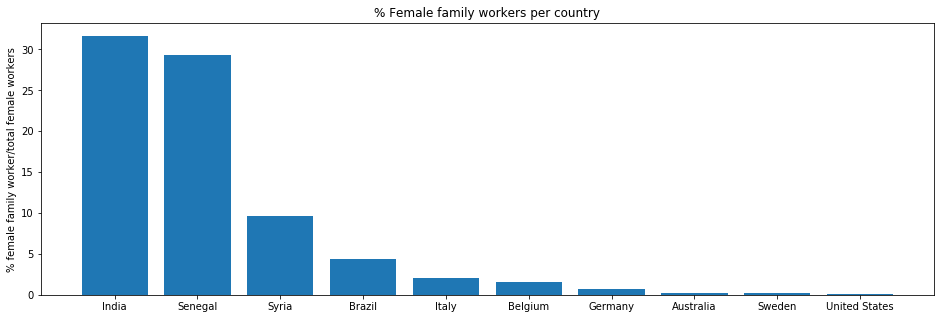

In [34]:
# Create bar graph to give context on the Female Family workers indicator
Fig, ax = plt.subplots(figsize = (16,5))
ax.set_title('% Female family workers per country')
ax.set_ylabel('% female family worker/total female workers')
female_country = df_countries_recent.iloc[:,0:2].sort_values(by = 'female_10_15', ascending = False).reset_index(drop = True)
xvalues = female_country.index
yvalues = female_country.female_10_15
xlabels = female_country.country

plt.bar( xvalues, yvalues, tick_label = xlabels);


In [35]:
# Show table of correlations with all the different indicators
df_countries_recent.corr(method = 'pearson').iloc[:,0:1].nlargest(10, columns = 'female_10_15')


,female_10_15
female_10_15,1.000000
male_10_15,0.923132
male/female_10_15,-0.203044
income_10_15,-0.823931
hdi_10_15,-0.883994
school_10_15,-0.942666


> All the indicators are strongly correlated to % female family workers, which may mean that it could be easily predictable. Let's check if it is the case by showing more results

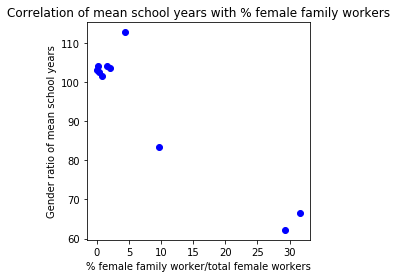

In [36]:
# Correlation graph with the strongest potential "predictor" of % female family workers
Fig, ax = plt.subplots(figsize = (4,4))
ax.set_title('Correlation of mean school years with % female family workers')
ax.set_ylabel('Gender ratio of mean school years')
ax.set_xlabel('% female family worker/total female workers')
plt.scatter(df_countries_recent.female_10_15,df_countries_recent.school_10_15,color='b');

> There is a strong negative correlation between % female family worker/total female workers and Gender ratio of mean school years. The countries where women go more years to school than men are correlated with less female family workers. And very directly we observe that countries where women go less in school correlate with much more women family workers in this country

> Thought: Does it mean that in these countries with less %female family workers, there are less female building families or that females who have families work less? - We do not have data in this analysis about the number of families in a country.

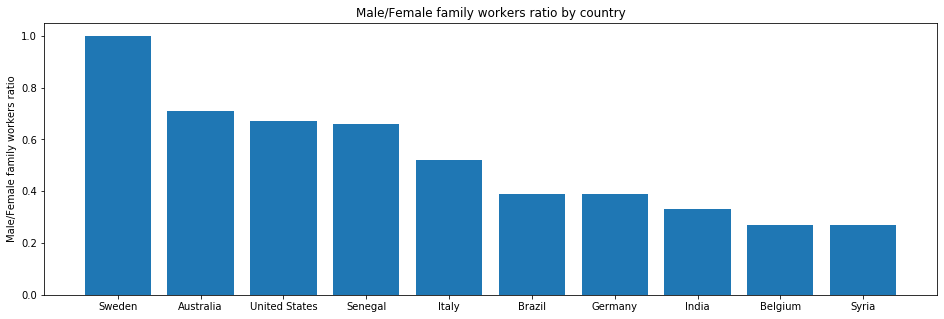

In [37]:
# Male/Female family workers ratio by country
Fig, ax = plt.subplots(figsize = (16,5))
ax.set_title('Male/Female family workers ratio by country')
ax.set_ylabel('Male/Female family workers ratio')
male_female_country = df_countries_recent.iloc[:, np.r_[0,6]].sort_values(by = 'male/female_10_15' ,ascending = False).reset_index(drop = True)
xvalues = male_female_country.index
yvalues = male_female_country['male/female_10_15']
xlabels = male_female_country.country

plt.bar( xvalues, yvalues, tick_label = xlabels);

In [38]:
df_level = df_countries_recent.groupby('country_level').agg({'income_10_15': np.mean, 'hdi_10_15': np.mean,'male/female_10_15': np.mean}).round(2)
df_level

,income_10_15,hdi_10_15,male/female_10_15
country_level,,,
developed,42711.11,0.91,0.59
emerging,6895.00,0.60,0.41


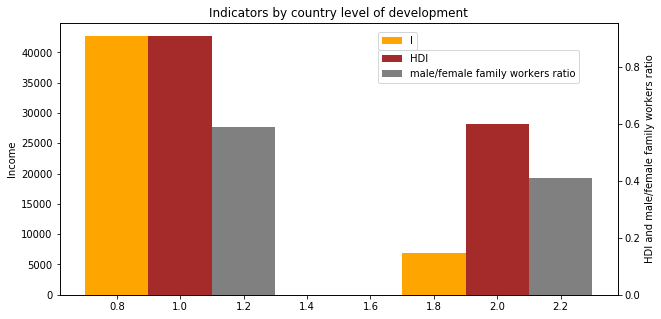

In [39]:
# Indicators by country level of development

#Set the plots and figures configuration in graph
Fig, ax1 = plt.subplots(figsize = (10,5))
ax2 = ax1.twinx()


#Title and axis labels
ax1.set_title('Indicators by country level of development')
ax1.set_ylabel('Income')
ax2.set_ylabel('HDI and male/female family workers ratio')

# X coordinates, x labels and y values
xvalues = [1,2]
xlabels = df_level.index
y1 = df_level.income_10_15
y2 = df_level.hdi_10_15
y3 = df_level['male/female_10_15']

#Plot the whole data
w = 0.2
a = ax1.bar([0.8,1.8], y1, width=w, color='orange', align='center')
b = ax2.bar(xvalues, y2, width=w, color='brown', align='center')
c = ax2.bar([1.2,2.2], y3, width=w, color='grey', align='center')

#Legend
ax1.legend(labels = 'Income', loc = (0.57,0.9))
ax2.legend((b[0], c[0]), ('HDI', 'male/female family workers ratio'), loc = (0.57,0.78))
plt.show();

### General question 2:
#### How did male/female ratio of family workers evolved in developed countries in the past vs. today ?

##### Conclusion: 
 Developed countries saw the equality of genders in family workers increase along with other things like income, gender ratio of mean school years (years spent by female/male at school), and HDI. According to the analysis for the first question, there are defnitely less female family workers in developed countries but it tends to happen the same to male family workers as a country develops.

In [40]:
# Prepare the data to show in graph
df_past = df_countries_past.groupby('country_level').mean().reset_index()
df_recent = df_countries_recent.groupby('country_level').mean().reset_index()
df_past_dev = df_past[df_past['country_level'] == "developed"]
df_recent_dev = df_recent[df_recent['country_level'] == "developed"]

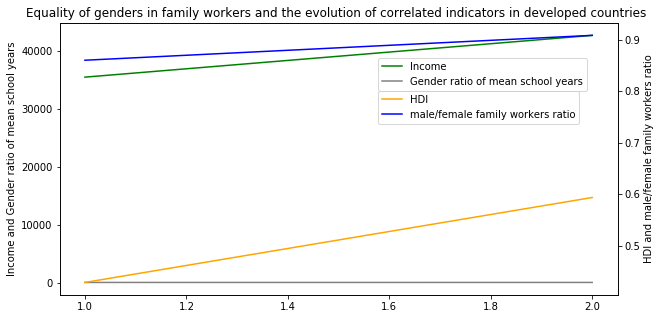

In [41]:
# Equality of genders in family workers and the evolution of correlated indicators in developed countries 

#Set the plots and figures configuration in graph
Fig, ax1 = plt.subplots(figsize = (10,5))
ax2 = ax1.twinx()


#Title and axis labels
ax1.set_title('Equality of genders in family workers and the evolution of correlated indicators in developed countries ')
ax1.set_ylabel('Income and Gender ratio of mean school years')
ax2.set_ylabel('HDI and male/female family workers ratio')

# X coordinates, x labels and y values
xvalues = [1,2]
xlabels = ['1995 to 2000', '2010 to 2015']
y1 = [df_past_dev['male/female_95_00'],df_recent_dev['male/female_10_15'] ]
y2 = [df_past_dev['income_95_00'],df_recent_dev['income_10_15'] ]
y3 = [df_past_dev['school_95_00'],df_recent_dev['school_10_15'] ]
y4 = [df_past_dev['hdi_95_00'],df_recent_dev['hdi_10_15'] ]

#Plot the whole data
w = 0.2
a = ax2.plot(xvalues, y1, color='orange')
b = ax1.plot(xvalues, y2, color='green')
c = ax1.plot(xvalues, y3, color='grey')
d = ax2.plot(xvalues, y4, color='blue')

#Legend
ax1.legend((b[0], c[0]), ('Income', 'Gender ratio of mean school years'), loc = (0.57,0.75))
ax2.legend((a[0], d[0]), ('HDI', 'male/female family workers ratio'), loc = (0.57,0.63));